### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

### Estruturas de dados

A função `gera_accd`, gera as estruturas principais do autômato celular contador de distâncias.

Para cada célula existe uma tupla com três valores (id_material, dx, dy), mas nesse exeplo
o material vai ser constante. E em vez de usar valores de tuplas para cada celula de matriz, iremos criar duas matrizes distintas com os valores para cada indice da tupla do modelo de Colombo.

A matriz de ativação (ativado) define o estado de propagação, verdadeiro para quando a célula já realizou o seu devido trabalho.

In [2]:
def gera_accd(tamanho_malha=0):
    return {
        "dx": np.full((tamanho_malha, tamanho_malha), np.inf),
        "dy": np.full((tamanho_malha, tamanho_malha), np.inf),
        "ativado": np.zeros((tamanho_malha, tamanho_malha), dtype=bool),
        "tamanho_malha":tamanho_malha
    }

### Funções especiais

- Função de processamento, no processo de autômatos o valor da célula é definida dependendo de seu estado e dos seus vizinhos, mas para questão de otimização do modelo de Colombo, em vez de ter uma segunda matriz de dados, o autor propós usar a célula atual para propagar sua informação entre seus vizinhos, caso ela for a melhor escolha.
- Em seu método de otimização, foi proposto usar uma lista para armazenar as células que representam a frente de onda, assim é possível mapear toda a matriz e ao mesmo tempo processar a propagação da informação das frentes de ondas.

In [3]:
def processar(accd, pontos_emissao):

    # Fila de processamento da propagação da frente de onda
    frente_onda = deque()

    # Inicializando os pontos de emissão
    for i, j in pontos_emissao:
        accd["dx"][i,j] = 0
        accd["dy"][i,j] = 0
        accd["ativado"][i,j] = True 
        frente_onda.append((i, j))

    cont = 0
    while frente_onda:
        # Removendo a primeira célula da frente de onda
        i, j = frente_onda.popleft()

        # Indices dos vizinhos e seus respectivos vetores unitários 
        vizinhos = [
            (i+1, j, 1, 0), # Direita
            (i-1, j, 1, 0), # Esquerda
            (i, j+1, 0, 1), # Cima
            (i, j-1, 0, 1)  # baixo
        ]

        # Percorrendo os vizinhos
        for ni, nj, vdx, vdy in vizinhos:
            
            # Verifica a célula pertence a malha
            if 0 <= ni < accd["tamanho_malha"] and 0 <= nj < accd["tamanho_malha"]:
                
                # Calcula as novas distâncias do vizinho
                novo_dx = accd["dx"][i,j] + vdx
                novo_dy = accd["dy"][i,j] + vdy
                nova_distancia = novo_dx**2 + novo_dy**2
                
                # Distância atual do vizinho
                distancia_vizinho = accd["dx"][ni,nj]**2 + accd["dy"][ni,nj]**2

                # Define para o vizinho a melhor distância
                if nova_distancia < distancia_vizinho:
                    accd["dx"][ni,nj] = novo_dx
                    accd["dy"][ni,nj] = novo_dy

                    # Adiciona o vizinho para ser uma nova frente de onda
                    accd["ativado"][ni,nj] = True 
                    frente_onda.append((ni, nj))


- Função de visualização, ela realiza o calculo de magnitude das distâncias do modelo, e plota por padrão as cores ao decorrer do tempo ou
  o padrão de ondas quando o parâmetro **seno** é verdadeiro.

In [4]:
def visualizacao(accd, titulo="", seno=False):

    mapa = np.sqrt(accd["dx"]**2 + accd["dy"]**2)
    if seno: mapa = np.sin(mapa)
        
    plt.figure()
    img = plt.imshow(mapa, cmap="inferno", origin="lower")
    #plt.colorbar(img)
    plt.title(titulo)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Simulações


### Simulação de pontos de emissão de ondas

Único ponto no eixo zero

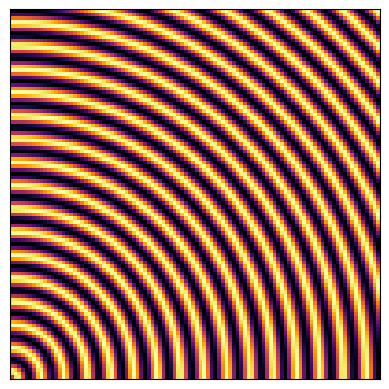

In [5]:
accd1 = gera_accd(100)
pontos_emissao = [(0,0)]
processar(accd1, pontos_emissao)
visualizacao(accd1, seno=True)

Único ponto no centro

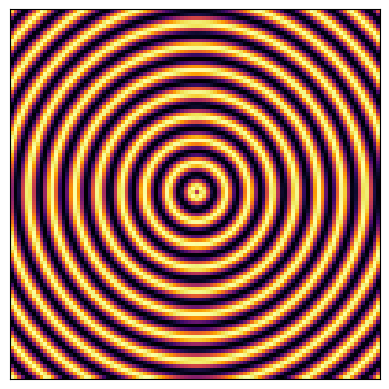

In [15]:
accd2 = gera_accd(100)
pontos_emissao = [(50,50)]
processar(accd2, pontos_emissao)
visualizacao(accd2, seno=True)

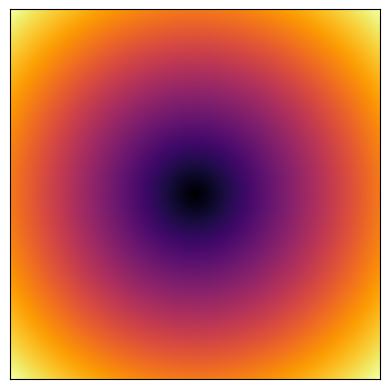

In [13]:
visualizacao(accd2)

Frente de onda linear saindo do eixo y

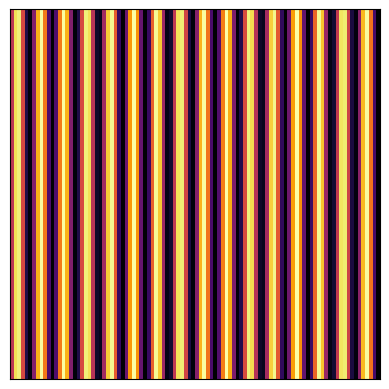

In [9]:
accd3 = gera_accd(100)
pontos_emissao = [(i,0) for i in range(100)]
processar(accd3, pontos_emissao)
visualizacao(accd3, seno=True)